Inital population:6
People initally infected:3


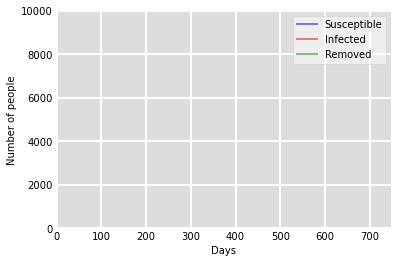

          Date  susceptible  infected  removed
0   2020-03-19          3.0       3.0      0.0
1   2020-03-20          NaN       NaN      NaN
2   2020-03-21          NaN       NaN      NaN
3   2020-03-22          NaN       NaN      NaN
4   2020-03-23          NaN       NaN      NaN
..         ...          ...       ...      ...
743 2022-04-01          NaN       NaN      NaN
744 2022-04-02          NaN       NaN      NaN
745 2022-04-03          NaN       NaN      NaN
746 2022-04-04          NaN       NaN      NaN
747 2022-04-05          NaN       NaN      NaN

[748 rows x 4 columns]


In [50]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
 
# Total population, N.
N = int(input("Inital population:"))
# Initial number of infected and recovered individuals, I0 and R0.
I0 = int(input("People initally infected:"))
R0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
#beta, gamma = 0.2, 1./10
contact_rate = 0.2
recovery_rate = 1/10
# A grid of time points (in days)
t_span = np.linspace(0, 748, 748)
h = t_span[1]-t_span[0]
 
 
# The SIR model differential equations.
def deriv(y, N, contact_rate, recovery_rate):
    S, I, R = y
    dSdt = -contact_rate * S * I / N
    dIdt = contact_rate * S * I / N - recovery_rate * I
    dRdt = recovery_rate * I
    return np.array([dSdt, dIdt, dRdt])
     
 
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
line = [ax.plot([], [], 'b', alpha=0.5, lw=2, label='Susceptible')[0]]
line.append(ax.plot([], [], 'r', alpha=0.5, lw=2, label='Infected')[0])
line.append(ax.plot([], [], 'g', alpha=0.5, lw=2, label='Removed')[0])
ax.set_xlabel('Days')
ax.set_ylabel('Number of people')
ax.set_ylim(0,10000)  #just check that this value is correct
ax.set_xlim(0,len(t_span))
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
X = np.empty((3,len(t_span)))*np.nan
X[:,0] = (S0,I0,R0)

# initialization function: plot the background of each frame
def init():
    [line[i].set_data([], []) for i in range(3)]
    return line
 
# animation function.  This is called sequentially
def animate(i):
    dX = deriv(X[:,i],N,contact_rate,recovery_rate)
    X[:,i+1] = X[:,i] + h*dX
   
    line[0].set_data(t_span, X[0,:])
    line[1].set_data(t_span, X[1,:])
    line[2].set_data(t_span, X[2,:])
    return line

def dataframe(): #trying to put the data into a data frame
    rng = pd.date_range('19-03-2020', periods = 748, freq= 'D')
    #from graph, get the yposition every day
    susceptible = []
    infected = []
    removed = []
    for s in X[0,:]: #trying to add a y value every day to the susceptible list
        susceptible.append(s)
        #s+=1   
    for i in X[1,:]:
        infected.append(i)
        #i+=1
    for r in X[2,:]:
        removed.append(r)
        #r+=1
    
    df = pd.DataFrame({'Date':rng, 'susceptible': susceptible, 'infected': infected, 'removed': removed})
    df.to_csv = ('Dataframes')
    #df.savefig('Dataframesimulation')
    print(df)
    

anim =FuncAnimation(fig, animate, init_func=init, frames=len(t_span)-1, interval=20, blit=True)
plt.savefig('Admissions_Graph')
plt.show()
dataframe()


## 